# Wrangle and Analyse Data Project: WeRateDogs Twitter 

## Project overview 
Wrangle and analyse the tweet archive for Twitter user @dog_rates, also knowns as WeRateDog

## Data gathering 

In [40]:
import pandas as pd
import numpy as np
import requests 

In [41]:
# data file 1: Enhanced twitter archive (basic tweet data with ratings only, total should be 2356)
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [42]:
# data file 2: additional data via Twitter API 
# (NB: I do not hold a Twitter account, and unless it's absolute necessary, I don't wish to make one, hence used the file provided)
import tweepy 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer 

In [8]:
consumer_key = 'X4Brx0KqE3BHMhfM7klRQzGb5'
consumer_secret = '8KBd6D3cjoNH02Iv3SQuyZDY62xxIjO6qFHI0C3msHBCslg4H9'
access_token = '901126343823327234-k6ITYAZnJsAwHqSpc8z4aTTfEhiM6bt'
access_secret = 'GZaqeDQ3Vxy6GiNIhZavJIJ5QveLSkM4BbUHeaWWMmj9j'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [9]:
count = 0
fails_dict = {}
start=timer()

In [10]:
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [43]:
df2 = pd.read_json("tweet_json.txt", lines=True)

In [44]:
# data file 3: image predictions alosnside each tweet ID, image URL, and the prediction number
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# read in tsv file as a pandas dataframe 
df3 = pd.read_csv('image-predictions.tsv', sep='\t')


## Data assessing 

### Assessment 1. Twitter Archive Enhanced (df1)

In [45]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [47]:
# to see if there is any duplicated entry from same Tweet_id 
sum(df1.tweet_id.duplicated())

0

In [48]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [49]:
# expand colum width to infinite to view the 'text' column which seems to have important information 
pd.set_option('display.max_colwidth', -1)
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [50]:
# the 'text' column seems to include the 'retweeted data' (begins with "RT")
# identify how many entries are retweeted data 
df1[df1['text'].str.match("RT")]
# the result shows there are total 183 of them 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [51]:
# according to the project overview, it suggests that we 'would want original ratings that have images'
# therefore, let's check if there are any entries without images (see if 'expanded_urls' is null)
sum(df1.expanded_urls.isnull())
# the result shows that 59 entries don't have any images

59

In [52]:
# let's investigate if there is any odd data with rating_numerator and denominator 
df1.rating_numerator.value_counts()
# the result shows that some of them are really high (although the project overview said it could be normal)
# and 2 entries have 0

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [53]:
df1.query('rating_numerator == 0')
# this just means they are giving '0' rating. leave it for now 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [54]:
# check rating_denominator 
df1.rating_denominator.value_counts()
# again, while most of them are based on 10, it has other numbers too, including 0

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [55]:
# check the data with rating_denominator = 0
df1.query('rating_denominator == 0')
# ok, this data reveals that the rating was recorded wrongly, and the correct one would be 13/10
# this also reveals that one text cell can contain multiple fractions, which could have caused wrong recording 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [56]:
# check if other formats were used in the 'text' column rather than one #/# 
df1[df1.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,"https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for 

In [57]:
df1[df1.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].shape
# the result shows that 33 entries have more than one fraction, causing wrong rating recording 
# for some it's obvious what's the correct one, but for some it's not clear 
# some of them also include retweeted data 

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(33, 17)

- Re: Rating -
The findings above show that the rating was recorded in a various format (e.g. 3 1/2), and this raises the concern that the rating numerators and denominators were not correctly recorded. However, as they are recorded separatly, it's difficult to identify which one is wrongly recorded (i.e. no consistent comparison possible)
Therefore, it might be necessary to create a new 'rating' column, combining both numerator and denominator values. 

### Assessment 2. Additional Tweeter API data (df2)

In [58]:
df2

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",37561,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,NaN,NaN,NaN,NaN,8194,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ cover photo: @TPaningning', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8018158, 'friends_count': 12, 'listed_count': 6189, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 141865, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 10151, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1112594177961844736/qQK8NJT-_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1112594177961844736/qQK8NJT-_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1554098098', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'ht

In [59]:
df2.info()
# 'id' is used, instead of 'tweet_id' as in the 'df1' table
# and it includes lots of data, and some of them are duplicated to other columns in df1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [60]:
df2.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2337.000000,0.0,2.337000e+03,2.337000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2203.0,2203.0,2.600000e+01,2.600000e+01,2337.000000
mean,NaN,NaN,7849.994437,NaN,7.420692e+17,7.420692e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2879.811724
std,NaN,NaN,12167.433936,NaN,6.824243e+16,6.824243e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4865.203464
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1364.000000,NaN,6.783345e+17,6.783345e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,580.000000
50%,NaN,NaN,3421.000000,NaN,7.185406e+17,7.185406e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1345.000000
75%,NaN,NaN,9620.000000,NaN,7.986825e+17,7.986825e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3357.000000
max,NaN,NaN,162293.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,82532.000000


In [61]:
# check if there is any duplicated entry with the same ID
sum(df2.id.duplicated())

0

In [62]:
# to see if there are any retweets 
df2.retweeted.value_counts()

False    2337
Name: retweeted, dtype: int64

### Assessment 3. Image predictions (df3)

In [63]:
df3

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [64]:
df3.info()
# 'tweet_id' is used like in the 'df1' table 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
# to see if there is any duplicated entry from same tweet_id 
sum(df3.tweet_id.duplicated())

0

In [66]:
# to see if there is any entry without images 
sum(df3.jpg_url.isnull())

0

In [67]:
df3.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
# check what are the common image predictions
df3.p1.value_counts()
# the result shows that some names are lowcase, and some are not dog images 
# let's see if it's the same in p2 and p3

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
German_shepherd              20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
teddy                        18 
Maltese_dog                  18 
Shetland_sheepdog            18 
beagle                       18 
Eskimo_dog                   18 
Shih-Tzu                     17 
Lakeland_terrier             17 
Rottweiler                   17 
kuvasz                       16 
Italian_greyhound            16 
          

In [69]:
df3.p1_dog.value_counts()
# the result shows 543 image entries are not dog images 

True     1532
False    543 
Name: p1_dog, dtype: int64

In [70]:
df3.p2.value_counts()
# again same issues found 

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
French_bulldog                    41 
Chesapeake_Bay_retriever          41 
toy_poodle                        37 
cocker_spaniel                    34 
miniature_poodle                  33 
Siberian_husky                    33 
beagle                            28 
Eskimo_dog                        27 
collie                            27 
Pembroke                          27 
kuvasz                            26 
Italian_greyhound                 22 
American_Staffordshire_terrier    21 
Pekinese                          21 
malinois                          20 
chow                              20 
miniature_pinscher                20 
toy_terrier                       20 
Samoyed                           20 
Boston_bull                       19 
Norwegian_elkhound                19 
Staffordshir

In [71]:
df3.p2_dog.value_counts()
# the result shows that 522 of them are not dog images 

True     1553
False    522 
Name: p2_dog, dtype: int64

In [72]:
df3.p3.value_counts()
# same issues 

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [73]:
df3.p3_dog.value_counts()
# the result shows that 576 of them are not dog images 

True     1499
False    576 
Name: p3_dog, dtype: int64

### Other assessment 

In [74]:
# to see if t here is any other duplicated title used in all three DataFrames
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

30    in_reply_to_status_id
32    in_reply_to_user_id  
46    source               
49    tweet_id             
dtype: object

### Summary (Issues found)

#### Quality 

##### Enhanced tweeter archive (`df1`)
- Q1. 59 rows do not have images 
- Q2. 182 rows contain ‘RT’ in the Text column (i.e. retweeted data)
- Q3. The ‘expanded_urls’ column contains more than one link
- Q4. 33 rows contain more than one fraction (#/# format) in the text cell, causing wrong rating recording  
- Q5. Some 'text' cell contains other rating formats (e.g. 3 1/2: tweet_id = 666287406224695296)
- Q6. tweet_id = 835246439529840640 (index 313) contains wrong rating_numerator and denominator (not 960/00, but 13/10) (but this data does not have the 'expanded_urls', therefore, by fixing Q1, this issue will be gone too)

##### Image predicitons (`df3`)
- Q7. 543 (p1_dog), 522 (p2_dog), and 576 (p3_dog) are identified as not ‘dog’ images
- Q8. In the 'p1', 'p2', and 'p3' columns, some entries are lowcase 


- Q9. Different number of rows in three tables: 2356 (`df1`), 2337 (`df2`), 2075 (`df3`)


#### Tidiness 

- T1. In the `df1` table, 'rating_numerator' and 'rating_deonominator' separated into two columns (difficult to compare overall)
- T2. in the `df1` table, more than one rating included in the 'text' column 
- T3. In the `df1` table, dog_stage is divided into four columns 
- T4. In the `df2` table, too many informaiton in one cell (e.g. 'user', 'entities', etc.)
- T5. 'id'/'tweet_id' columns duplicated in three tables
- T6. The 'full_text' column in the `df2` is duplicated the `df1` table 
- T7. All three tables should be merged into one master DataFrame 


## Data cleaning 

In [75]:
# first create a copy of each DataFrames 
df1_c = df1.copy()
df2_c = df2.copy()
df3_c = df3.copy()

### Completeness 

#### `Q1`: In the 'df1' table, 59 entries do not have images

##### Define 
Remove 'external_urls' = na rows 

##### Code 

In [76]:
df1_c = df1_c.dropna(subset=['expanded_urls'])

##### Test

In [77]:
sum(df1_c.expanded_urls.isnull())

0

In [78]:
df1_c.shape
# Now there are total 2297 entries (= 2356 - 59) 

(2297, 17)

#### `Q2`: In the `df1` table, 182 rows contain ‘RT’ in the Text column (i.e. retweeted data)

##### Define 
Remove rows start with "RT", and save the clean one as df1_c1

##### Code 

In [79]:
df1_c1 = df1_c[~df1_c.text.str.match("RT")]

##### Test

In [80]:
sum(df1_c1.text.str.match("RT"))

0

In [81]:
df1_c1.shape
# now there are 2115 rows (= 2297 - 182)

(2115, 17)

### Quality / Tidiness 

As the rating part includes both quality- and tidiness-related issues, this will be sorted out here together 

#### `T1`: In the `df1` table, 'rating_numerator' and 'rating_deonominator' separated into two columns (difficult to compare overall)
#### `T2`: In the `df1` table, more than one rating included in the 'text' column
#### `Q4`: 33 rows contain wrong rating_numerator/denominator due to more than one fraction included in the text cell  
#### `Q5`: Some 'text' cell contains other rating formats (e.g. 3 1/2: tweet_id = 666287406224695296)

Extra rating related issues 
#### `Q6`: tweet_id = 835246439529840640 (index 313) contains wrong rating_numerator and denominator (not 960/00, but 13/10): already resolved by removing rows with 'expanded_urls' = na 
#### check rows that have rating_numerator = 0 or rating_denominator_0 


#### `T1`: In the `df1` table, 'rating_numerator' and 'rating_deonominator' separated into two columns (difficult to compare overall)
#### `T2`: In the `df1` table, more than one rating included in the 'text' column


##### Define 
Remove rows start with "RT", and save the clean one as df1_c1

##### Code 

In [82]:
df1_c1['rating'] = df1_c1.rating_numerator.div(df1_c1.rating_denominator)

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Test (to check if a new column is added in a correct form)

In [83]:
df1_c1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10

In [84]:
# check if there is any NaN
df1_c1.rating.isnull().values.any()

False

In [85]:
df1_c1.shape

(2115, 18)

#### `Q4`: 33 rows contain wrong rating_numerator/denominator due to more than one fraction included in the text cell 


##### Define 
Correct rating or remove the unnecessary rows

##### Code 

In [86]:
df1_c1[df1_c1.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].shape
# total 27 entries (reduced from 33 after first cleaning stage)

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(27, 18)

In [87]:
# to investigate in detail 
df1_c1[df1_c1.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None,1.200000
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None,1.000000
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,0.818182
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,0.200000
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,1.000000
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,None,None,None,None,1.000000
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,None,None,None,None,0.900000
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,None,None,None,None,0.400000
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_ra

Mulitple issues found 
- After the first cleaning process, now there are 27 rows that contain more than one fraction format 
- 1 row is not a dog image (need to be removed)
- 16 rows contain either ratings for 2 dogs or 2 ratings for one dog, but it's not clear which one is the correct one (all remove)
- ratings of 6 rows should be corrected 
- 4 rows already have correct rating (no furrther action required): index = 766, 1525, 1970, 2010

#### `treatments`: 17 rows contain misleading ratings  


##### Define 
Remove 7 rows

##### Code 

In [88]:
# drop the followign rows 
df1_index = df1_c1.set_index("tweet_id")
df1_index.shape

(2115, 17)

In [89]:
df1_index[df1_index.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,,,,,,,,,
777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None,1.200000
747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None,1.000000
740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,0.818182
722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,0.200000
716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,1.000000
714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,None,None,None,None,1.000000
703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,None,None,None,None,0.900000
695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,None,None,None,None,0.400000
694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/6943528399933440

In [90]:
# remove the row with no dog image (I'm sure there is an easier way to do this, but not sure how...)
drop1 = df1_index.drop([747600769478692864])
# remove ratings for 2 dogs or more than 2 ratings for one dog, but not sure which one is correct 
drop2 = drop1.drop([714258258790387713])
drop3 = drop2.drop([703356393781329922])
drop4 = drop3.drop([694352839993344000])
drop5 = drop4.drop([691483041324204033])
drop6 = drop5.drop([689835978131935233])
drop7 = drop6.drop([677314812125323265])
drop8 = drop7.drop([676191832485810177])
drop9 = drop8.drop([674737130913071104])
drop10 = drop9.drop([674646392044941312])
drop11 = drop10.drop([671154572044468225])
drop12 = drop11.drop([670434127938719744])
drop13 = drop12.drop([669037058363662336])
drop14= drop13.drop([668537837512433665])
drop15 = drop14.drop([667544320556335104])
drop16 = drop15.drop([667491009379606528])
df1_c2 = drop16.drop([666835007768551424])


##### Test 

total 17 rows removed, so the result should be 27 - 17 = 10

In [91]:
df1_c2[df1_c2.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].shape

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(10, 17)

Mulitple issues found 
- After the first cleaning process, now there are 27 rows that contain more than one fraction format 
- 1 row is not a dog image (need to be removed)
- 16 rows contain either ratings for 2 dogs or 2 ratings for one dog, but it's not clear which one is the correct one (all remove)
- ratings of 6 rows should be corrected 
- 4 rows already have correct rating (no furrther action required): index = 766, 1525, 1970, 2010

#### `treatments`: 6 rows contain wrong ratings  


##### Define 
Correct ratings for 6 identified rows 

##### Code 

In [92]:
# identify those 6 rows again
df1_c2[df1_c2.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,,,,,,,,,
777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None,1.200000
740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None,0.818182
722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None,0.200000
716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None,1.000000
695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,None,None,None,None,0.400000
690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367696297985/photo/1,10,10,Eriq,None,None,None,None,1.000000
682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None,0.636364
673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,None,None,pupper,None,0.800000
672248013293752320,NaN,NaN,2015-12-03 02:56:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672248013293752320/photo/1,10,10,None,None,None,None,None,1.000000


In [93]:
df1_c2.loc[[740373189193256964], ['rating']] = 1.4
df1_c2.loc[[722974582966214656], ['rating']] = 1.3
df1_c2.loc[[716439118184652801], ['rating']] = 1.1
df1_c2.loc[[695064344191721472], ['rating']] = 1.3
df1_c2.loc[[682962037429899265], ['rating']] = 1.0
df1_c2.loc[[666287406224695296], ['rating']] = 0.9
# the last one fixes Q5 too 

##### Test 

In [94]:
print(
df1_c2.loc[740373189193256964, 'rating'],
df1_c2.loc[722974582966214656, 'rating'],
df1_c2.loc[716439118184652801, 'rating'],
df1_c2.loc[695064344191721472, 'rating'],
df1_c2.loc[682962037429899265, 'rating'],
df1_c2.loc[666287406224695296, 'rating'])

1.4 1.3 1.1 1.3 1.0 0.9


**Before moving on, let's check if there is any abnormality with 'rating'**

In [95]:
df1_c2.rating.value_counts()
# the result shows that there could still be some issues. Just to make sure, let's investigate entries that have more than 2.0 rating 

1.200000      492
1.000000      428
1.100000      421
1.300000      297
0.900000      154
0.800000      97 
0.700000      50 
1.400000      41 
0.600000      32 
0.500000      32 
0.300000      19 
0.400000      14 
0.200000      9  
0.100000      4  
0.000000      2  
2.700000      1  
3.428571      1  
177.600000    1  
2.600000      1  
42.000000     1  
7.500000      1  
Name: rating, dtype: int64

In [96]:
df1_c2.query('rating >= 2')

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,,,,,,,,,
810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,3.428571
786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,7.500000
778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,2.700000
749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,177.600000
680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,2.600000
670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None,42.000000


Again multiple issues found 
- tweet_id = 810984652412424192: does not contain a correct rating information 
- 3 rows have a rating_numerator in decimal 
- 2 rows (rating_numerator = 1776 and 420) just gave a very generous point (no further action required)

#### `treatments`: tweet_id = 810984652412424192: does not contain a correct rating information 


##### Define 
Remove the entry 

##### Code 

In [97]:
df1_c3 = df1_c2.drop([ 810984652412424192])

##### Test 

In [98]:
df1_c3.query('rating >= 2')

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,,,,,,,,,
786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,7.5
778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,2.7
749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None,177.6
680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,2.6
670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None,42.0


#### `treatments`: 3 rows have a rating_numerator in decimal 


##### Define 
Record the correct rating 

##### Code 

In [99]:
# first identify if there are more rows with decimal numerator 
df1_c3[df1_c3.text.str.contains(r"(\d+\.\d*\/\d+)")]
# 4 entries found

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,,,,,,,,,
883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None,0.5
786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None,7.5
778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None,2.7
680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None,2.6


In [100]:
# update the rating 
df1_c3.loc[[883482846933004288], ['rating']] = 1.35
df1_c3.loc[[786709082849828864], ['rating']] = 0.975
df1_c3.loc[[778027034220126208], ['rating']] = 1.127
df1_c3.loc[[680494726643068929], ['rating']] = 1.126

##### Test 

In [101]:
print(
df1_c3.loc[883482846933004288, 'rating'],
df1_c3.loc[786709082849828864, 'rating'],
df1_c3.loc[778027034220126208, 'rating'],
df1_c3.loc[680494726643068929, 'rating'])

1.35 0.975 1.127 1.126


In [102]:
# check the rating again 
df1_c3.rating.value_counts()

1.200      492
1.000      428
1.100      421
1.300      297
0.900      154
0.800      97 
0.700      50 
1.400      41 
0.600      32 
0.500      31 
0.300      19 
0.400      14 
0.200      9  
0.100      4  
0.000      2  
0.975      1  
1.350      1  
1.127      1  
1.126      1  
177.600    1  
42.000     1  
Name: rating, dtype: int64

In [103]:
# just to make sure, let's check the entry with rating = 0
df1_c3.loc[df1_c3['rating']==0]
# it seems that those entries either contain an image error or the image was 'plagiarised'

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
tweet_id,,,,,,,,,,,,,,,,,
835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None,0.0
746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None,0.0


#### `treatments`: 2 rows with images plagiarised or not available (tweet_id = 835152434251116546 and 746906459439529985)


##### Define 
Remove two rows 

##### Code 

In [104]:
df1_c3_d1 = df1_c3.drop([835152434251116546])
df1_c4 = df1_c3_d1.drop([746906459439529985])

##### Test 

In [105]:
df1_c4.rating.value_counts()
# 0 is gone 

1.200      492
1.000      428
1.100      421
1.300      297
0.900      154
0.800      97 
0.700      50 
1.400      41 
0.600      32 
0.500      31 
0.300      19 
0.400      14 
0.200      9  
0.100      4  
0.975      1  
1.350      1  
1.127      1  
1.126      1  
177.600    1  
42.000     1  
Name: rating, dtype: int64

### Other quality issues 

#### `Q7`: 543 (p1_dog), 522 (p2_dog), and 576 (p3_dog) are identified as not ‘dog’ images

##### Define 
Check the confidence rating of those 'false' dog images and remove rows if necessary   

##### Code 

In [106]:
df3_c[(df3_c.p1_dog ==False) & (df3_c.p2_dog == False) & (df3_c.p3_dog == False)].shape
# 324 entries are considered as not dog images (2075 - 324 = 1751)

(324, 12)

In [107]:
df3_c[(df3_c.p1_dog ==False) & (df3_c.p2_dog == False) & (df3_c.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [108]:
# create a DataFrame with p1_dog, p2_dog and p3_dog all true 
df3_c1 = df3_c[(df3_c.p1_dog ==True) & (df3_c.p2_dog == True) & (df3_c.p3_dog == True)]

##### Test 

In [109]:
df3_c1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


#### `Q8`: In the 'p1', 'p2', and 'p3' columns, some entries are lowcase 

##### Define 
change all name to lowcase    

##### Code 

In [110]:
df3_c1.p1 = df3_c1.p1.str.lower()
df3_c1.p2 = df3_c1.p2.str.lower()
df3_c1.p3 = df3_c1.p3.str.lower()

C:\Users\gymin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


##### Test 

In [111]:
df3_c1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,gordon_setter,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,walker_hound,0.260857,True,english_foxhound,0.175382,True,ibizan_hound,0.097471,True


### Tidiness 

#### `T3`: In the `df1` table, dog stage is divided into four columns 

##### Define 
Combine four columns to one  

##### Code 

In [112]:
# create a 'dog_stage' column by extrating the dog stage variables from the text column when available 
df1_c4['dog_stage'] = df1_c4['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

##### Test 

In [113]:
df1_c4.head(10)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,dog_stage
tweet_id,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,1.3,NaN
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,1.3,NaN
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,1.2,NaN
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,1.3,NaN
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,1.2,NaN
891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None,1.3,NaN
890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,1.3,NaN
890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None,1.3,NaN
890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rat

In [114]:
df1_c4.dog_stage.value_counts()

pupper     241
doggo      81 
puppo      29 
floofer    4  
Name: dog_stage, dtype: int64

#### `T7`: All three tables should be merged into one master dataframe  

##### Define 
Combine df1, df2, df3 into one master Dataframe 

In order to do this task few extra tidying process will be conducted 

##### Code 

In [115]:
# Remove unnecessary columsn from df1
df1_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls', 'source','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
df1_c5 = df1_c4.drop(df1_columns, axis=1)

In [116]:
# check if it's clean
df1_c5
# total 2095

,timestamp,text,rating,dog_stage
tweet_id,,,,
892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,1.3,NaN
892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",1.3,NaN
891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,1.2,NaN
891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,1.3,NaN
891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",1.2,NaN
891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,1.3,NaN
890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,1.3,NaN
890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,1.3,NaN
890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,1.3,NaN


In [117]:
# create a copy of df2 that contains only id, retweet_count, and favorite_count 
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
df2_c1 = pd.DataFrame(data)
columns = ['id', 'retweet_count', 'favorite_count']
df2_c1 = df2_c1[columns]

In [118]:
# check if it worked 
df2_c1
# total 2337

,id,retweet_count,favorite_count
0,892420643555336193,8194,37561
1,892177421306343426,6060,32286
2,891815181378084864,4008,24326
3,891689557279858688,8350,40909
4,891327558926688256,9041,39099
5,891087950875897856,3003,19667
6,890971913173991426,1985,11494
7,890729181411237888,18204,63395
8,890609185150312448,4121,27034
9,890240255349198849,7115,30987


In [119]:
# create a copy of df3 that contains only tweet_id, p1, p1_conf, p2, p2_conf, p3, p3_conf
df3_c2 = df3_c1[['tweet_id', 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf']]

In [120]:
# check if it worked 
df3_c2
# total 1243

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,666020888022790149,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428
1,666029285002620928,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010
2,666033412701032449,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629
5,666050758794694657,bernese_mountain_dog,0.651137,english_springer,0.263788,greater_swiss_mountain_dog,0.016199
9,666058600524156928,miniature_poodle,0.201493,komondor,0.192305,soft-coated_wheaten_terrier,0.082086
10,666063827256086533,golden_retriever,0.775930,tibetan_mastiff,0.093718,labrador_retriever,0.072427
11,666071193221509120,gordon_setter,0.503672,yorkshire_terrier,0.174201,pekinese,0.109454
12,666073100786774016,walker_hound,0.260857,english_foxhound,0.175382,ibizan_hound,0.097471


In [121]:
# now merge three df1_c5, df2_c1, df3_c2
df_m1 = pd.merge(left=df3_c2, right=df2_c1, left_on='tweet_id', right_on='id', how='inner')
df_m2 = pd.merge(left=df_m1, right=df1_c5, left_on='tweet_id', right_index=True, how='inner' )

In [122]:
df_m2

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,id,retweet_count,favorite_count,timestamp,text,rating,dog_stage
0,666020888022790149,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428,666020888022790149,494,2514,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0.80,NaN
1,666029285002620928,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010,666029285002620928,46,125,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,0.70,NaN
2,666033412701032449,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,666033412701032449,43,121,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,0.90,NaN
3,666044226329800704,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,666044226329800704,135,290,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,0.60,NaN
4,666049248165822465,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629,666049248165822465,41,105,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,0.50,NaN
5,666050758794694657,bernese_mountain_dog,0.651137,english_springer,0.263788,greater_swiss_mountain_dog,0.016199,666050758794694657,56,130,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,1.00,NaN
6,666058600524156928,miniature_poodle,0.201493,komondor,0.192305,soft-coated_wheaten_terrier,0.082086,666058600524156928,57,109,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,0.80,NaN
7,666063827256086533,golden_retriever,0.775930,tibetan_mastiff,0.093718,labrador_retriever,0.072427,666063827256086533,211,462,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,1.00,NaN
8,666071193221509120,gordon_setter,0.503672,yorkshire_terrier,0.174201,pekinese,0.109454,666071193221509120,57,142,2015-11-16 01:52:02 +0000,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,0.90,NaN
9,666073100786774016,walker_hound,0.260857,english_foxhound,0.175382,ibizan_hound,0.097471,666073100786774016,157,315,2015-11-16 01:59:36 +0000,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,1.00,NaN


In [123]:
df_master = df_m2.drop('id', axis =1)

##### Test 

In [124]:
df_master
# total 1185 data collected 

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,timestamp,text,rating,dog_stage
0,666020888022790149,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428,494,2514,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0.80,NaN
1,666029285002620928,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010,46,125,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,0.70,NaN
2,666033412701032449,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,43,121,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,0.90,NaN
3,666044226329800704,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,135,290,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,0.60,NaN
4,666049248165822465,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629,41,105,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,0.50,NaN
5,666050758794694657,bernese_mountain_dog,0.651137,english_springer,0.263788,greater_swiss_mountain_dog,0.016199,56,130,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,1.00,NaN
6,666058600524156928,miniature_poodle,0.201493,komondor,0.192305,soft-coated_wheaten_terrier,0.082086,57,109,2015-11-16 01:01:59 +0000,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,0.80,NaN
7,666063827256086533,golden_retriever,0.775930,tibetan_mastiff,0.093718,labrador_retriever,0.072427,211,462,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,1.00,NaN
8,666071193221509120,gordon_setter,0.503672,yorkshire_terrier,0.174201,pekinese,0.109454,57,142,2015-11-16 01:52:02 +0000,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,0.90,NaN
9,666073100786774016,walker_hound,0.260857,english_foxhound,0.175382,ibizan_hound,0.097471,157,315,2015-11-16 01:59:36 +0000,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,1.00,NaN


## Data store

In [125]:
# now we save this final clean data to .csv file for data analysis 

df_master.to_csv('twitter_archive_master.csv', index=False)

## Data analysis

In [126]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,timestamp,text,rating,dog_stage
0,666020888022790149,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428,494,2514,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0.8,NaN
1,666029285002620928,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010,46,125,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,0.7,NaN
2,666033412701032449,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,43,121,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,0.9,NaN
3,666044226329800704,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,135,290,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,0.6,NaN
4,666049248165822465,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629,41,105,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,0.5,NaN


### Analysis 1. Time trend 

In [127]:
# to check if there is any time trend when people respond to tweets 
df_time = df.set_index("timestamp")


In [128]:
df_time

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,text,rating,dog_stage
timestamp,,,,,,,,,,,,
2015-11-15 22:32:08 +0000,666020888022790149,welsh_springer_spaniel,0.465074,collie,0.156665,shetland_sheepdog,0.061428,494,2514,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,0.80,NaN
2015-11-15 23:05:30 +0000,666029285002620928,redbone,0.506826,miniature_pinscher,0.074192,rhodesian_ridgeback,0.072010,46,125,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,0.70,NaN
2015-11-15 23:21:54 +0000,666033412701032449,german_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,43,121,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,0.90,NaN
2015-11-16 00:04:52 +0000,666044226329800704,rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,135,290,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,0.60,NaN
2015-11-16 00:24:50 +0000,666049248165822465,miniature_pinscher,0.560311,rottweiler,0.243682,doberman,0.154629,41,105,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,0.50,NaN
2015-11-16 00:30:50 +0000,666050758794694657,bernese_mountain_dog,0.651137,english_springer,0.263788,greater_swiss_mountain_dog,0.016199,56,130,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,1.00,NaN
2015-11-16 01:01:59 +0000,666058600524156928,miniature_poodle,0.201493,komondor,0.192305,soft-coated_wheaten_terrier,0.082086,57,109,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,0.80,NaN
2015-11-16 01:22:45 +0000,666063827256086533,golden_retriever,0.775930,tibetan_mastiff,0.093718,labrador_retriever,0.072427,211,462,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,1.00,NaN
2015-11-16 01:52:02 +0000,666071193221509120,gordon_setter,0.503672,yorkshire_terrier,0.174201,pekinese,0.109454,57,142,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,0.90,NaN


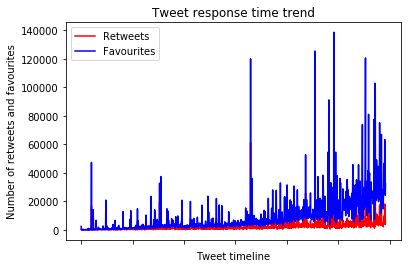

In [129]:
# but not sure why x axis doesn't show the time informaiton. I tried to set xticks as index, but it keeps causing an error
# any suggestion would be great 
df_time['retweet_count'].plot(color='red', label='Retweets')
df_time['favorite_count'].plot(color='blue', label='Favourites')
plt.legend(loc='upper left')
plt.xlabel('Tweet timeline')
plt.ylabel('Number of retweets and favourites')
plt.title('Tweet response time trend')
plt.savefig('time_trend.png')
plt.show()

#### Insight 1. Time trend

**Gradual increase in the number of retweets and favourites show that WeRateDogs twitter account is gaining its popularity**

### Analysis 2. Popular dog types 

In [130]:
# check the rating and dog types 
df_dog = df[df.rating >= 1]

In [131]:
df_dog

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,timestamp,text,rating,dog_stage
5,666050758794694657,bernese_mountain_dog,0.651137,english_springer,0.263788,greater_swiss_mountain_dog,0.016199,56,130,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,1.00,NaN
7,666063827256086533,golden_retriever,0.775930,tibetan_mastiff,0.093718,labrador_retriever,0.072427,211,462,2015-11-16 01:22:45 +0000,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,1.00,NaN
9,666073100786774016,walker_hound,0.260857,english_foxhound,0.175382,ibizan_hound,0.097471,157,315,2015-11-16 01:59:36 +0000,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,1.00,NaN
13,666102155909144576,english_setter,0.298617,newfoundland,0.149842,borzoi,0.133649,11,77,2015-11-16 03:55:04 +0000,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,1.10,NaN
14,666273097616637952,italian_greyhound,0.176053,toy_terrier,0.111884,basenji,0.111152,75,169,2015-11-16 15:14:19 +0000,Can take selfies 11/10 https://t.co/ws2AMaNwPW,1.10,NaN
16,666345417576210432,golden_retriever,0.858744,chesapeake_bay_retriever,0.054787,labrador_retriever,0.014241,131,283,2015-11-16 20:01:42 +0000,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,1.00,NaN
18,666373753744588802,soft-coated_wheaten_terrier,0.326467,afghan_hound,0.259551,briard,0.206803,88,182,2015-11-16 21:54:18 +0000,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,1.10,NaN
21,666418789513326592,toy_terrier,0.149680,papillon,0.148258,chihuahua,0.142860,45,121,2015-11-17 00:53:15 +0000,This is Walter. He is an Alaskan Terrapin. Loves outdated bandanas. One ear still working. Cool house plant. 10/10 https://t.co/qXpcwENTvn,1.00,NaN
22,666421158376562688,blenheim_spaniel,0.906777,cocker_spaniel,0.090346,shih-tzu,0.001117,112,310,2015-11-17 01:02:40 +0000,*internally screaming* 12/10 https://t.co/YMcrXC2Y6R,1.20,NaN
26,666454714377183233,dalmatian,0.278954,labrador_retriever,0.237612,great_pyrenees,0.171106,207,509,2015-11-17 03:16:00 +0000,I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua,1.00,NaN


In [132]:
df_dog.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,1.007000e+03,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,7.523570e+17,0.637083,0.143233,0.060444,2937.996028,10218.858987,1.147769
std,6.964008e+16,0.250024,0.103640,0.053088,4800.373471,13558.871311,0.110332
min,6.660508e+17,0.055379,0.000056,0.000008,11.000000,77.000000,1.000000
25%,6.853184e+17,0.432498,0.055913,0.013234,781.000000,2589.500000,1.100000
50%,7.423859e+17,0.658808,0.132449,0.047608,1660.000000,5794.000000,1.200000
75%,8.130895e+17,0.857876,0.204129,0.094431,3380.000000,12875.000000,1.200000
max,8.921774e+17,0.999885,0.467678,0.273419,61109.000000,138618.000000,1.400000


In [133]:
# it seems that p1 prediction is most reliable. Therefore, we only select the dog types with top 25% prediciton 
dog_predict = df_dog[(df_dog.p1_conf >= 0.85)]

In [134]:
dog_predict
# total 259 rows

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,timestamp,text,rating,dog_stage
16,666345417576210432,golden_retriever,0.858744,chesapeake_bay_retriever,0.054787,labrador_retriever,0.014241,131,283,2015-11-16 20:01:42 +0000,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,1.00,NaN
22,666421158376562688,blenheim_spaniel,0.906777,cocker_spaniel,0.090346,shih-tzu,0.001117,112,310,2015-11-17 01:02:40 +0000,*internally screaming* 12/10 https://t.co/YMcrXC2Y6R,1.20,NaN
47,667182792070062081,golden_retriever,0.949892,irish_setter,0.010564,chesapeake_bay_retriever,0.005821,6181,14231,2015-11-19 03:29:07 +0000,This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,1.00,NaN
53,667435689202614272,rottweiler,0.999091,miniature_pinscher,0.000450,black-and-tan_coonhound,0.000157,83,302,2015-11-19 20:14:03 +0000,Ermergerd 12/10 https://t.co/PQni2sjPsm,1.20,NaN
57,667502640335572993,labrador_retriever,0.996709,golden_retriever,0.001688,beagle,0.000712,219,531,2015-11-20 00:40:05 +0000,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,1.10,NaN
70,668190681446379520,blenheim_spaniel,0.958402,cocker_spaniel,0.026764,welsh_springer_spaniel,0.007790,197,653,2015-11-21 22:14:07 +0000,This is Skittles. I would kidnap Skittles. Pink dog in back hasn't moved in days. 12/10 https://t.co/2wm0POA9N2,1.20,NaN
82,668567822092664832,shih-tzu,0.985649,lhasa,0.007078,pekinese,0.003053,56,243,2015-11-22 23:12:44 +0000,This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3,1.10,NaN
89,668852170888998912,golden_retriever,0.903529,tibetan_mastiff,0.041497,kuvasz,0.022500,168,453,2015-11-23 18:02:38 +0000,Say hello to Bobb. Bobb is a Golden High Fescue &amp; a proud father of 8. Bobb sleeps while the little pups play. 11/10 https://t.co/OmxouCZ8IY,1.10,NaN
99,669327207240699904,golden_retriever,0.919584,labrador_retriever,0.049669,kuvasz,0.010216,118,575,2015-11-25 01:30:16 +0000,Just got home from college. Dis my dog. She does all my homework. Big red turd in background. 13/10 no bias at all https://t.co/6WGFp9cuj6,1.30,NaN
110,669573570759163904,west_highland_white_terrier,0.946828,miniature_schnauzer,0.022344,cairn,0.009462,143,435,2015-11-25 17:49:14 +0000,This is Linda. She just looked up and saw you glancing at your neighboring classmate's test. 10/10 https://t.co/UpFFYhA1Id,1.00,NaN


In [135]:
# check what dog types are commonly appeared 
dog_predict.p1.value_counts()

golden_retriever                  41
pembroke                          28
labrador_retriever                19
pug                               16
pomeranian                        16
samoyed                           12
french_bulldog                    8 
chihuahua                         6 
chow                              6 
toy_poodle                        5 
shetland_sheepdog                 5 
vizsla                            4 
bernese_mountain_dog              4 
great_pyrenees                    4 
blenheim_spaniel                  4 
american_staffordshire_terrier    4 
cocker_spaniel                    3 
german_short-haired_pointer       3 
west_highland_white_terrier       3 
malamute                          3 
airedale                          3 
maltese_dog                       3 
german_shepherd                   3 
old_english_sheepdog              2 
beagle                            2 
rottweiler                        2 
doberman                          2 
t

In [136]:
# now compare the rating of top 5 dogs: golden_retriever, pembroke, labrador_retriever, pomeranian, pug 
golden_r = dog_predict[(dog_predict.p1 == "golden_retriever")]
pembroke = dog_predict[(dog_predict.p1 == "pembroke")]
labrador_r = dog_predict[(dog_predict.p1 == "labrador_retriever")]
pomeranian = dog_predict[(dog_predict.p1 == "pomeranian")]
pug = dog_predict[(dog_predict.p1 == "pug")]

In [137]:
golden_r.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,7.629447e+17,0.928088,0.034465,0.010688,3307.658537,12570.658537,1.201220
std,7.585827e+16,0.043008,0.030078,0.009870,2898.645801,11251.258644,0.106353
min,6.663454e+17,0.853284,0.001948,0.000453,118.000000,283.000000,1.000000
25%,6.909597e+17,0.888181,0.013834,0.002412,1190.000000,3714.000000,1.100000
50%,7.563033e+17,0.936333,0.025119,0.008786,2173.000000,8827.000000,1.200000
75%,8.217659e+17,0.961110,0.045948,0.016056,6065.000000,18524.000000,1.300000
max,8.895311e+17,0.993830,0.135460,0.037881,9583.000000,44596.000000,1.400000


In [138]:
pembroke.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,7.839331e+17,0.953628,0.030881,0.006041,4322.464286,15206.464286,1.214286
std,7.727727e+16,0.035246,0.024033,0.006310,3048.755854,12901.586080,0.097046
min,6.755315e+17,0.868511,0.003216,0.000074,398.000000,1203.000000,1.000000
25%,7.104214e+17,0.934446,0.014956,0.000251,1685.750000,4794.000000,1.200000
50%,7.722170e+17,0.962390,0.024914,0.004481,4091.500000,12246.500000,1.200000
75%,8.661808e+17,0.981022,0.039126,0.008368,5665.750000,23191.250000,1.300000
max,8.896654e+17,0.993449,0.103708,0.020221,11135.000000,46707.000000,1.400000


In [139]:
labrador_r.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,7.650465e+17,0.924109,0.034635,0.012381,2623.157895,10753.736842,1.157895
std,8.324566e+16,0.047658,0.023982,0.010031,2657.120418,10759.171570,0.096124
min,6.675026e+17,0.850050,0.000098,0.000008,196.000000,531.000000,1.000000
25%,6.756429e+17,0.886388,0.014654,0.002854,548.500000,1725.000000,1.100000
50%,7.512054e+17,0.921393,0.038254,0.012061,1479.000000,6574.000000,1.200000
75%,8.508016e+17,0.952562,0.048285,0.016906,4126.000000,18809.000000,1.200000
max,8.827627e+17,0.999885,0.074358,0.033489,10739.000000,34243.000000,1.300000


In [140]:
pomeranian.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,7.212656e+17,0.958936,0.021872,0.006752,2180.750000,5651.875000,1.11250
std,5.440797e+16,0.042322,0.023803,0.008810,3720.761454,7091.934582,0.10247
min,6.696839e+17,0.856590,0.000605,0.000373,106.000000,372.000000,1.00000
25%,6.842790e+17,0.954958,0.004288,0.000882,754.250000,2250.500000,1.07500
50%,6.993218e+17,0.965261,0.020113,0.003863,1080.000000,3244.000000,1.10000
75%,7.368935e+17,0.987496,0.024147,0.007525,2039.750000,5826.000000,1.12500
max,8.224629e+17,0.998275,0.090129,0.033146,15698.000000,29780.000000,1.40000


In [141]:
pug.describe()

,tweet_id,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,1.600000e+01,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000
mean,7.293636e+17,0.979709,0.009424,0.002124,2123.06250,6687.812500,1.093750
std,6.430560e+16,0.028447,0.011297,0.002790,2355.45411,7796.618696,0.106262
min,6.722542e+17,0.883952,0.000547,0.000073,346.00000,1424.000000,1.000000
25%,6.860860e+17,0.975969,0.001375,0.000303,803.75000,2307.250000,1.000000
50%,6.974166e+17,0.985229,0.004054,0.000775,968.00000,3226.500000,1.100000
75%,7.493351e+17,0.997344,0.012505,0.002488,3360.00000,9270.500000,1.125000
max,8.728207e+17,0.999120,0.038559,0.009840,9580.00000,31518.000000,1.300000


In [142]:
from pandas import DataFrame
Data = {'dog':  ['golden_retriever', 'pembroke', 'labrador_retriever', 'pomeranian', 'pug'],
        'avg_rating': [golden_r.rating.mean(), pembroke.rating.mean(), labrador_r.rating.mean(), pomeranian.rating.mean(), pug.rating.mean()],
        'avg_retweet': [golden_r.retweet_count.mean(), pembroke.retweet_count.mean(), labrador_r.retweet_count.mean(), pomeranian.retweet_count.mean(), pug.retweet_count.mean()],
        'avg_favorite': [golden_r.favorite_count.mean(), pembroke.favorite_count.mean(), labrador_r.favorite_count.mean(), pomeranian.favorite_count.mean(), pug.favorite_count.mean()],
        'total_count': [golden_r.shape[0], pembroke.shape[0], labrador_r.shape[0], pomeranian.shape[0], pug.shape[0]]                 }

top_dog = DataFrame (Data, columns = ['dog','avg_rating', 'avg_retweet', 'avg_favorite', 'total_count'])

In [143]:
top_dog

,dog,avg_rating,avg_retweet,avg_favorite,total_count
0,golden_retriever,1.201220,3307.658537,12570.658537,41
1,pembroke,1.214286,4322.464286,15206.464286,28
2,labrador_retriever,1.157895,2623.157895,10753.736842,19
3,pomeranian,1.112500,2180.750000,5651.875000,16
4,pug,1.093750,2123.062500,6687.812500,16


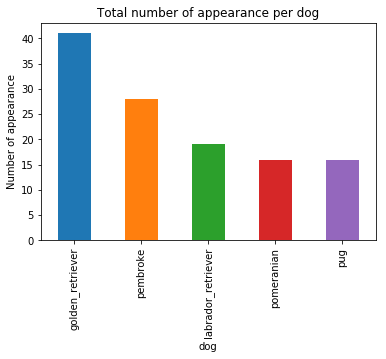

In [144]:
top_dog.set_index('dog')['total_count'].plot.bar()
plt.title("Total number of appearance per dog")
plt.ylabel("Number of appearance")
plt.savefig('total_dog.png')

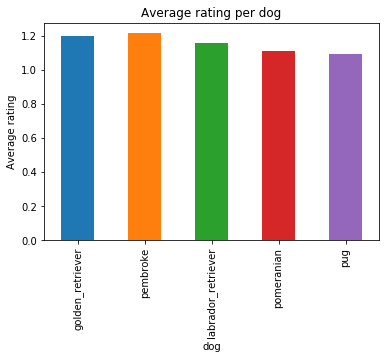

In [145]:
top_dog.set_index('dog')['avg_rating'].plot.bar()
plt.title("Average rating per dog")
plt.ylabel("Average rating")
plt.savefig('rating_dog.png')

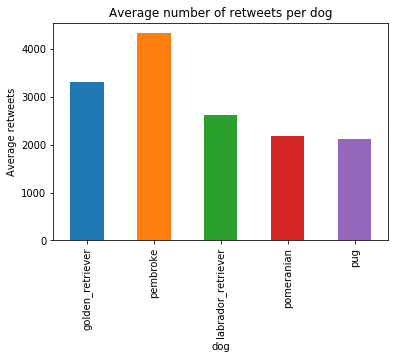

In [146]:
top_dog.set_index('dog')['avg_retweet'].plot.bar()
plt.title("Average number of retweets per dog")
plt.ylabel("Average retweets")
plt.savefig('retweet_dog.png')

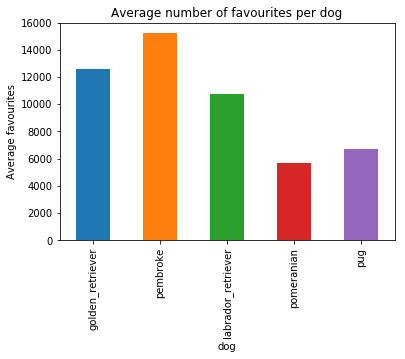

In [147]:
top_dog.set_index('dog')['avg_favorite'].plot.bar()
plt.title("Average number of favourites per dog")
plt.ylabel("Average favourites")
plt.savefig('favorite_dog.png')

#### Insight 2. Popular dog types

**Although golden retriever appeared most, there was no much difference in terms of rating and in fact, pembroke seems to be the most widely retweeted and favourited dog type**

### Analysis 3. Relationship between a rating and the number of retweets/favourites

In [148]:
df_r = df[['tweet_id', 'rating', 'retweet_count', 'favorite_count']]

In [149]:
df_r

,tweet_id,rating,retweet_count,favorite_count
0,666020888022790149,0.80,494,2514
1,666029285002620928,0.70,46,125
2,666033412701032449,0.90,43,121
3,666044226329800704,0.60,135,290
4,666049248165822465,0.50,41,105
5,666050758794694657,1.00,56,130
6,666058600524156928,0.80,57,109
7,666063827256086533,1.00,211,462
8,666071193221509120,0.90,57,142
9,666073100786774016,1.00,157,315


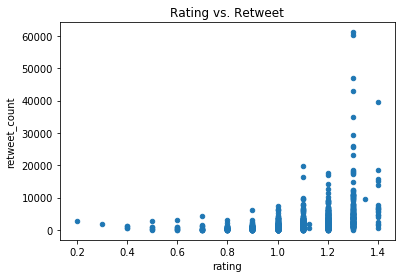

In [150]:
df_r.plot.scatter(x='rating', y='retweet_count', title="Rating vs. Retweet")
plt.savefig('scatter_rr.png')


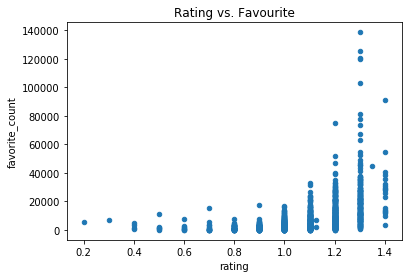

In [151]:
df_r.plot.scatter(x='rating', y='favorite_count', title="Rating vs. Favourite")
plt.savefig('scatter_rf.png')

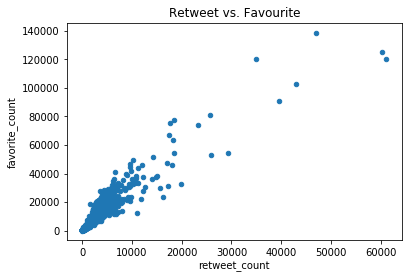

In [152]:
df_r.plot.scatter(x='retweet_count', y='favorite_count', title="Retweet vs. Favourite")
plt.savefig('scatter_rtf.png')

#### Insight 3. Relationship between rating, retweet and favourite 

**1. Positive correlation between rating and retweets: a tweet that received a higher rate is more likely to be retweeted**

**2. Positive correlation between rating and favourites: a tweet that received a higher rate is more likely to be marked as favourites** 

**3. Strong positive correlation between retweets and favourites: more favourite tweets were more retweetedhere is a tendency Although golden retriever appeared most, there was no much difference in terms of rating and in fact, pembroke**